In [111]:
# Imports
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
#matplotlib inline

In [112]:
X = pd.read_csv("mnist_784.csv", header = 0, sep = ",")
training_data = X.head(30000)
test_data = X[30000:]#remaining data

In [113]:
training_data = training_data.drop(columns=["class"])
test_data = test_data.drop(columns=["class"])

In [114]:
from sklearn.cluster import KMeans
from sklearn import metrics
test_labels =  X[30000:]["class"].to_numpy()

In [115]:
rand=np.ones(18)
inertie_intra=np.ones(18)
for k in range(2,20): 
    kmeans = KMeans(n_clusters=k, n_init=1).fit(training_data)
    inertie_intra[k-2]=kmeans.inertia_
    pred = kmeans.predict(test_data)
    rand[k-2]=metrics.adjusted_rand_score(pred, test_labels)
    

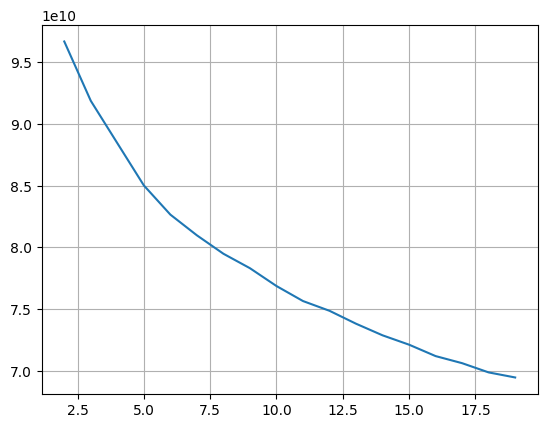

In [116]:

plt.plot(range(2,20),inertie_intra)
plt.grid(True)
plt.show()
#le choix optimal n'est pas clair

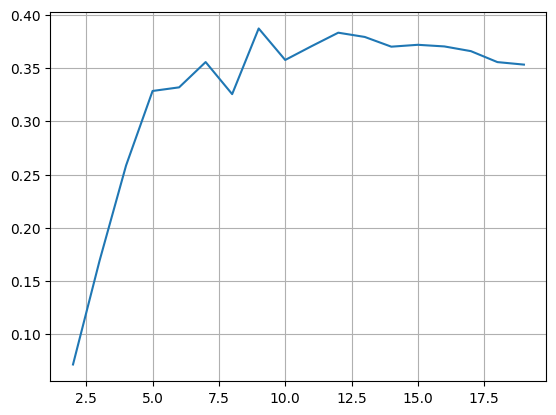

In [117]:
plt.plot(range(2,20),rand)
plt.grid(True)
plt.show()
#on va choisir 10 (rand score nous donne un choix <10 ou 10)

In [118]:
kmeans = KMeans(n_clusters=10, n_init=1).fit(test_data)

In [119]:
pred = kmeans.predict(test_data)


In [120]:
test_labels
print(test_labels.shape)
print(pred.shape)

(40000,)
(40000,)


In [121]:
metrics.adjusted_rand_score(pred, test_labels)
#valeur faible car Kmeans n'est idéal que pour des données de type "Round Clusters"

0.36646873266275

In [122]:
Pixels = X.drop(columns="class")
n=Pixels.shape[0]
p=Pixels.shape[1]
print(type(Pixels))

<class 'pandas.core.frame.DataFrame'>


In [123]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler().fit(Pixels)
Pixels_scaled = scaler.transform(Pixels)

In [124]:
from sklearn.decomposition import PCA

pca =  PCA(n_components=0.9,svd_solver='full')

pca.fit(Pixels_scaled)

PCA(n_components=0.9, svd_solver='full')

In [125]:
Psi_K = pca.transform(Pixels_scaled)
print("Psi_K",type(Psi_K),np.shape(Psi_K))
U_K=pca.components_ 
print("U",type(U_K),np.shape(U_K))
K=U_K.shape[0]
# .T =transposée 
print(U_K.T.dtype,np.shape(U_K.T))

Psi_K <class 'numpy.ndarray'> (70000, 238)
U <class 'numpy.ndarray'> (238, 784)
float64 (784, 238)


In [126]:
eig = pd.DataFrame(
    {   "Dimension" : ["Dim" + str(x + 1) for x in range(K)], 
        "Varianceexpliquée" : pca.explained_variance_,
        "%variance_expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "cumvarexpliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Varianceexpliquée,%variance_expliquée,cumvarexpliquée
0,Dim1,40.571729,6.0,6.0
1,Dim2,29.056829,4.0,10.0
2,Dim3,26.878569,4.0,13.0
3,Dim4,20.800965,3.0,16.0
4,Dim5,18.124464,3.0,19.0
...,...,...,...,...
233,Dim234,0.574495,0.0,90.0
234,Dim235,0.566375,0.0,90.0
235,Dim236,0.561708,0.0,90.0
236,Dim237,0.558907,0.0,90.0


In [127]:
std_vector=scaler.scale_
S_racine = np.diagflat(std_vector)

print(S_racine.shape)
print(scaler.mean_.reshape(1,-1).shape)
print(np.ones(784).reshape(-1,1).shape)


Pixels_r=np.dot(Psi_K,U_K)  # Z =Psi_K * U_K'
Pixels_r=np.dot(Pixels_r,S_racine)   #Y
Pixels_r=Pixels_r + np.dot(np.ones(n).reshape(-1,1),scaler.mean_.reshape(1,-1))  #X 
Pixels_r.shape

(784, 784)
(1, 784)
(784, 1)


(70000, 784)

In [128]:
def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns: Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()

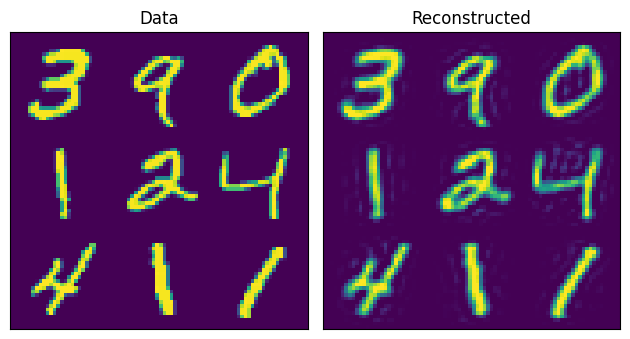

In [129]:
Pixels_array = Pixels.to_numpy()
plot_MNIST_reconstruction(Pixels_array,Pixels_r)

In [130]:
training_data1 = Pixels_r[:30000]
test_data1 = Pixels_r[30000:]#remaining data
print(training_data1.shape)
print(test_data1.shape)

(30000, 784)
(40000, 784)


In [131]:
kmeans1 = KMeans(n_clusters=10, n_init=1).fit(test_data1)


In [132]:
pred1 = kmeans1.predict(test_data1)
metrics.adjusted_rand_score(pred1, test_labels)
#coefficient proche de celui de l'original

0.3660479913090201

In [134]:
#même résultats pour les données centrées réduites
training_data2 = np.dot(Psi_K,U_K)[:30000]
test_data2 = np.dot(Psi_K,U_K)[30000:]#remaining data
kmeans2 = KMeans(n_clusters=10, n_init=1).fit(test_data2)
pred2 = kmeans2.predict(test_data2)
metrics.adjusted_rand_score(pred2, test_labels)

0.30189953158835087